<a href="https://colab.research.google.com/github/suajeong52/collapsible_tube/blob/main/collap(05_21_onlyU).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install sciann

     |████████████████████████████████| 174 kB 25.4 MB/s 
     |████████████████████████████████| 561 kB 51.5 MB/s 
     |████████████████████████████████| 460.3 MB 8.7 kB/s 
     |████████████████████████████████| 132 kB 63.3 MB/s 
     |████████████████████████████████| 4.0 MB 55.0 MB/s 
     |████████████████████████████████| 1.2 MB 51.6 MB/s 
     |████████████████████████████████| 14.8 MB 62.9 MB/s 
     |████████████████████████████████| 462 kB 5.8 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68717 sha256=3559997ae7ccb505712064f662e3a756e68add1352643452f6171b91f5bfb786
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: numpy
    Found existin

In [2]:
import numpy as np 
import sciann as sn 
import matplotlib.pyplot as plt  
from numpy import pi
from sciann.utils.math import diff, sign, sin, sqrt, pow

---------------------- SCIANN 0.6.6.1 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.5.3 
Python Version: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0] 



In [3]:
x = sn.Variable('x')
t = sn.Variable('t')
u = sn.Functional('u', [x,t],8*[20], 'tanh')
#A = sn.Functional('A', [x,t],  8*[20], 'relu')

In [4]:
#L1 = diff(A, t) + u * diff(A, x) + A * diff(u, x)

In [5]:
rho = 1
#beta = 200
beta = 1
#L2 = diff(u, t) + u * diff(u, x) + beta / (2 * rho * sn.pow(A * A + 0.01, 0.25)) * diff(A, x, order=1)
L2 = diff(u, t) + u * diff(u, x)   - (0.01/pi)*diff(u, x, order=2)  

In [6]:
TOL = 0.001
T = 10
omega = 2 * np.pi / T
C1 = (1 - sign(t - TOL)) * (u - 1)
#C2 = (1 - sign(t - TOL)) * (A - 1)
#C3 = (1 - sign(x - TOL)) * (u - sin(omega * t))
#C3 = (1 - sign(x - TOL)) * (u - 1 - 0.2* sin(2*np.pi *t))
C3 = (1 - sign(x - TOL)) * (u - 0.2*sin(t*2*pi) - 1)
#C4 = (1 - sign(x - TOL)) * (A - 1)
C4 = (1 + sign(x - 1 + TOL)) * (u - diff(u,x))

In [7]:
#m = sn.SciModel([x,t], [L1,L2, C1, C3, C4], loss_func="mse", optimizer="Adam")
#m = sn.SciModel([x,t], [L2, C1], loss_func="mse", optimizer="Adam")

m = sn.SciModel([x,t], [L2, C1, C3, C4], loss_func="mse", optimizer="Adam")

In [8]:
x_data, t_data = np.meshgrid(
    np.linspace(0, 1, 100), 
    np.linspace(0, 1, 100)
)

In [9]:
#h = m.train([x_data, t_data], 6*['zero'], learning_rate=0.001, epochs=1000, batch_size =120,  verbose=1, shuffle=True)
h = m.train([x_data,t_data], 4*['zero'], learning_rate=0.001, epochs=2000, verbose=1, shuffle=True)


Total samples: 10000 
Batch size: 64 
Total batches: 157 

Epoch 1/2000
157/157 [==============================] - 7s 15ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.0340 - sub_loss: 0.0040 - mul_3_loss: 0.0081 - mul_7_loss: 0.0088 - mul_8_loss: 0.0131 - lr: 0.0010 - time: 6.6446
Epoch 2/2000
157/157 [==============================] - 4s 25ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.0230 - sub_loss: 0.0016 - mul_3_loss: 0.0037 - mul_7_loss: 0.0045 - mul_8_loss: 0.0133 - lr: 0.0010 - time: 3.8978
Epoch 3/2000
157/157 [==============================] - 4s 26ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.0158 - sub_loss: 0.0027 - mul_3_loss: 0.0032 - mul_7_loss: 0.0035 - mul_8_loss: 0.0065 - lr: 0.0010 - time: 4.0892
Epoch 4/2000
157/157 [==============================] - 4s 23ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.0133 - sub_loss: 0.0024 - mul_3_loss: 0.0027 - mul_7_loss: 0.0033 - mul_8_loss: 0.0048 - lr: 0.0010 - time: 3.6885
Epoch 5/2000
157/157 [==========

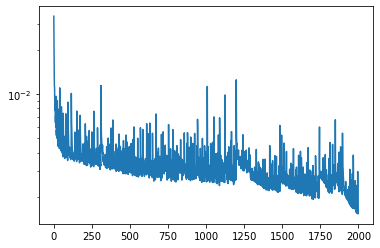

In [10]:
plt.semilogy(h.history['loss'])

In [11]:
h.history.keys()

dict_keys(['loss', 'sub_loss', 'mul_3_loss', 'mul_7_loss', 'mul_8_loss', 'lr', 'time'])

KeyError: ignored

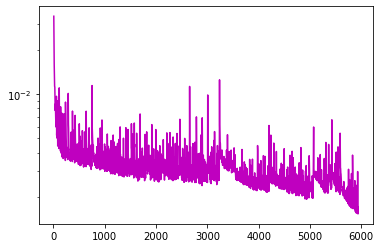

In [12]:
time = np.cumsum(h.history['time'])
plt.semilogy(time, h.history['loss'],'m')
plt.semilogy(time, h.history['add_loss'],'r')
#plt.semilogy(time, h.history['add_5_loss'],'b')
plt.semilogy(time, h.history['mul_2_loss'],'y')
plt.semilogy(time, h.history['mul_4_loss'],'c')
#plt.semilogy(time, h.history['mul_10_loss'],'k')
#plt.semilogy(time, h.history['mul_11_loss'],'g')
plt.legend(['loss','L2','C1', 'C3'])
plt.xlabel('time')
plt.ylabel('loss')
plt.show

In [13]:
x_test, t_test = np.meshgrid(
    np.linspace(0, 1, 100), 
    np.linspace(0, 0, 1)
)
u_pred = u.eval(m, [x_test, t_test])
#A_pred = A.eval(m, [x_test, t_test])




In [14]:
u_pred = np.reshape(u_pred,100)
#A_pred = np.reshape(A_pred,100)

In [15]:
x_test = np.reshape(x_test, 100)

Text(0, 0.5, 'u')

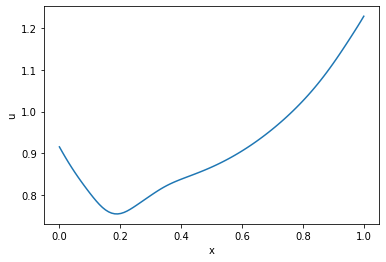

In [16]:
#fig = plt.figure(figsize=(3, 4))
plt.plot(x_test, u_pred)
plt.xlabel('x')
plt.ylabel('u')
#plt.ylim(0.8, 1.2)

Text(0, 0.5, 'u')

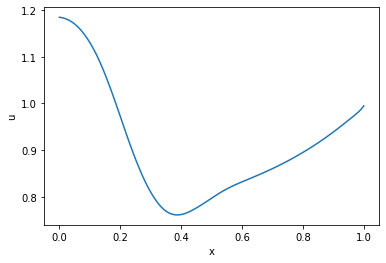

In [17]:
x_test, t_test = np.meshgrid(
    np.linspace(0, 1, 100), 
    np.linspace(0.25, 0.25, 1)
)
u_pred = u.eval(m, [x_test, t_test])
#A_pred = A.eval(m, [x_test, t_test])


u_pred = np.reshape(u_pred,100)
#A_pred = np.reshape(A_pred,100)
x_test = np.reshape(x_test, 100)


#fig = plt.figure(figsize=(3, 4))
plt.plot(x_test, u_pred)
plt.xlabel('x')
plt.ylabel('u')
#plt.ylim(0.8, 1.2)

Text(0, 0.5, 'u')

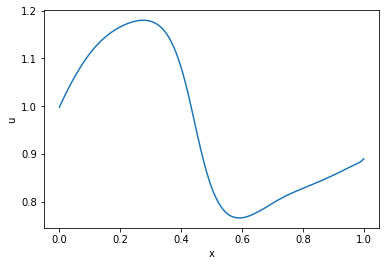

In [18]:
x_test, t_test = np.meshgrid(
    np.linspace(0, 1, 100), 
    np.linspace(0.5, 0.5, 1)
)
u_pred = u.eval(m, [x_test, t_test])
#A_pred = A.eval(m, [x_test, t_test])


u_pred = np.reshape(u_pred,100)
#A_pred = np.reshape(A_pred,100)
x_test = np.reshape(x_test, 100)


#fig = plt.figure(figsize=(3, 4))
plt.plot(x_test, u_pred)
plt.xlabel('x')
plt.ylabel('u')
#plt.ylim(0.8, 1.2)

Text(0, 0.5, 'u')

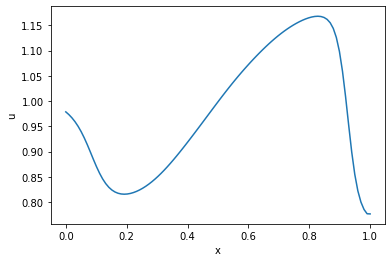

In [19]:
x_test, t_test = np.meshgrid(
    np.linspace(0, 1, 100), 
    np.linspace(1, 1, 1)
)
u_pred = u.eval(m, [x_test, t_test])
#A_pred = A.eval(m, [x_test, t_test])


u_pred = np.reshape(u_pred,100)
#A_pred = np.reshape(A_pred,100)
x_test = np.reshape(x_test, 100)


#fig = plt.figure(figsize=(3, 4))
plt.plot(x_test, u_pred)
plt.xlabel('x')
plt.ylabel('u')